# **TP 6 - Diagnostic par apprentissage**
# **Instrumentation ING3 2021/2022**
					

# *   **Encadré par : Anissa MOKRAOUI**	
# *  **Réalisé par : Edward PAEZ** 



# TD-TP 7 -- Autoencodeurs 


> Ce TD-TP a pour objectif de construire un autoencodeur pour trois types d'applications : reconstruction, débruitage et détection d'anomaies sur différents jeux de données.



---


# **Partie I - Introducution : reconstruction**

## 1) Téléchargez les librairies utiles :

In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


## 2) Expliquez les lignes de code ci-dessous :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
!cp /content/drive/MyDrive/Diagnostic_ING3/monalisa.jpg /content # Pour copier monalisa.jpg dans mon répertoire de travail

In [4]:
SIZE=256
img_data=[]

img=cv2.imread('monalisa.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors

## 3) Donnez la dimesion de l'image.

Image Dimensions : (256, 256, 3)


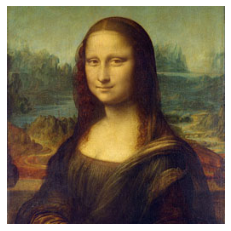

In [3]:
print('Image Dimensions :', img.shape) # Complétez
plt.axis('off')
plt.imshow(img)


In [8]:
img=cv2.resize(img,(SIZE, SIZE))
buffed =img_to_array(img)
print(img.dtype)
img_data.append(buffed)

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))

uint8


## 4) Donnez le type et la dimension de de img_array.

In [5]:
print('img_array Type :', img_array.dtype)
print('img_array Dimensions :', img_array.shape)

img_array Type : float32
img_array Dimensions : (1, 256, 256, 3)


## 5) Normalisez les données disponibles dans img_array.

In [6]:
img_array=img_array/255.

## 6) Expliquez l'architecture du réseau de neurones sur lequel vous serez amené à travailler (type de réseau, nombre de couches ...)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [9]:
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

## 7) Configurez l'architecture avant la phase d'entraiement en choisissant : 
- la fonction de côut 'mean_squared_error', 
- l'optimization :  'adam'
- la métrique de mesure de la performance : 'accuracy'

In [10]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics= ['accuracy'])

## 8) Donnez un aperçu du modèle et analysez le réseau.

In [11]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 8)        

## 9) Entrainez le modèle en prenant par exemple 20 épisodes. 

In [12]:
model.fit(img_array,img_array,epochs=1000)

Train on 1 samples
Epoch 1/1000
1/1 [==============================] - 1s 624ms/sample - loss: 0.1293 - accuracy: 0.1338
Epoch 2/1000
1/1 [==============================] - 0s 169ms/sample - loss: 0.1166 - accuracy: 0.1287
Epoch 3/1000
1/1 [==============================] - 0s 164ms/sample - loss: 0.1004 - accuracy: 0.1387
Epoch 4/1000
1/1 [==============================] - 0s 170ms/sample - loss: 0.0818 - accuracy: 0.1402
Epoch 5/1000
1/1 [==============================] - 0s 160ms/sample - loss: 0.0649 - accuracy: 0.1366
Epoch 6/1000
1/1 [==============================] - 0s 168ms/sample - loss: 0.0548 - accuracy: 0.1362
Epoch 7/1000
1/1 [==============================] - 0s 171ms/sample - loss: 0.0528 - accuracy: 0.1446
Epoch 8/1000
1/1 [==============================] - 0s 170ms/sample - loss: 0.0495 - accuracy: 0.1818
Epoch 9/1000
1/1 [==============================] - 0s 167ms/sample - loss: 0.0410 - accuracy: 0.2736
Epoch 10/1000
1/1 [==============================] - 0s 166ms/s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Edward\AppData\Local\Temp/ipykernel_13128/1461549336.py", line 1, in <module>
    model.fit(img_array,img_array,epochs=1000)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 342, in fit
    total_epochs=epochs)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 128, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 98, in ex

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Edward\AppData\Local\Temp/ipykernel_13128/1461549336.py", line 1, in <module>
    model.fit(img_array,img_array,epochs=1000)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 342, in fit
    total_epochs=epochs)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 128, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "C:\ProgramData\Anaconda3\envs\ti21\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 98, in ex

## 10) Prédisez le modèle.

In [115]:
print("Neural network output")
pred =model.predict(img_array[:5]) 
print("Pred =",pred)

Neural network output
Pred = [[[[0.34901947 0.3713772  0.22072183]
   [0.44001868 0.4612114  0.29352775]
   [0.44449097 0.50646245 0.31984258]
   ...
   [0.4689939  0.47353524 0.3451495 ]
   [0.48151177 0.45189878 0.3566678 ]
   [0.30400026 0.34381118 0.24215965]]

  [[0.43250477 0.40513387 0.21608213]
   [0.47579408 0.4648208  0.26918715]
   [0.45540252 0.5150201  0.30596685]
   ...
   [0.4898749  0.4975863  0.3663726 ]
   [0.4991159  0.45779455 0.36264396]
   [0.3480923  0.37561303 0.28651866]]

  [[0.42667395 0.39696866 0.22824325]
   [0.46516898 0.46380517 0.25801027]
   [0.4543789  0.53206676 0.27225056]
   ...
   [0.5075813  0.48931855 0.34116256]
   [0.49243706 0.4334241  0.33338165]
   [0.34101093 0.3607982  0.24766509]]

  ...

  [[0.35949636 0.32592687 0.26520947]
   [0.3765347  0.31774628 0.25623888]
   [0.34812495 0.28902036 0.257167  ]
   ...
   [0.33140412 0.24331051 0.19446513]
   [0.33870184 0.25414747 0.22433421]
   [0.3358187  0.26003736 0.20986044]]

  [[0.3566146  0

## 11) Affichez l'image prédite puis commentez le résultat.

(-0.5, 255.5, 255.5, -0.5)

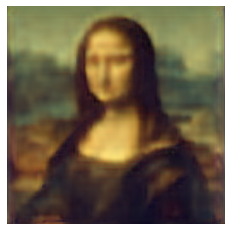

In [116]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")
plt.axis('off')

## 12) Augmentez le nombre d'épisode et analysez les images prédites obtenues.

On voit que l'image est moin bruité

# **Partie II - Débruitage d'images**

L'objectif de cette partie est de débruiter des images en utilisant un autoencodeur. Vous travaillerez avec le jeu de données MNIST.

---

## 1) Téléchargez le jeu de données MNIST

In [117]:
from tensorflow.keras.datasets import mnist

In [169]:
(x_train, _), (x_test, _) = mnist.load_data()

## 2) Donnez les dimensions du jeu de données ainsi que la taille des images. Normalisez ensuite les images.

In [170]:
print('x_train Type :', x_train.dtype)
print('x_train Dimensions :', x_train.shape)

x_train Type : uint8
x_train Dimensions : (60000, 28, 28)


In [171]:
print('x_test Type :', x_test.dtype)
print('x_test Dimensions :', x_test.shape)

x_test Type : uint8
x_test Dimensions : (10000, 28, 28)


In [172]:
print(x_train.max())

255


In [173]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

## 3) Expliquez les lignes ci-dessous :

In [174]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [175]:
print('x_train Type :', x_train.dtype)
print('x_train Dimensions :', x_train.shape)
print('x_test Type :', x_test.dtype)
print('x_test Dimensions :', x_test.shape)

x_train Type : float32
x_train Dimensions : (60000, 28, 28, 1)
x_test Type : float32
x_test Dimensions : (10000, 28, 28, 1)


On ajoute une dimension dans x_train et x_test

## 4) On souhaite construire à partir des images MNIST non-bruités des imges bruitées (bruit Gaussien) comme suit : 

In [176]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

## 5) Affichez une dizaine d'images bruitées :

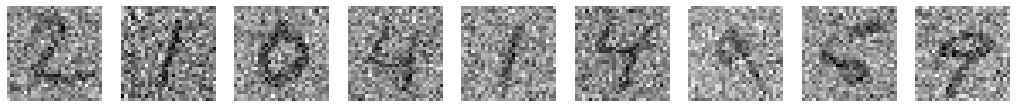

In [177]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()


## 6) Expliquez l'intérêt des lignes de code ci-dessous :

In [178]:
# un type d'égalisation
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## 7) Affichez une dizaine d'images bruitées puis commentez.

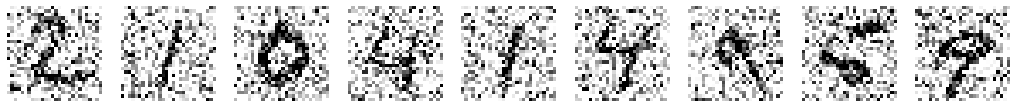

In [179]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()

## 8) Expliquez l'architecture du réseau de neuronnes sur lequel vous serez amené à travailler (type de réseau, nombre de couches ...)

In [180]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

## 9) Configurez l'architecture avant la phase d'entraiement en choisissant : 
- la fonction de côut 'mean_squared_error', 
- l'optimization :  'adam'
- la métrique de mesure de la performance : 'accuracy'

In [181]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics= ['accuracy'])

## 10) Donnez un aperçu du modèle et analysez le réseau.

In [182]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 8)         

## 11) Entrainez le modèle en utilisant par exemple 10 episodes et un batch_size de 256.

In [183]:
model.fit(x_train_noisy, x_train_noisy,batch_size=256, epochs=100)

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.1038 - accuracy: 0.4391
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0935 - accuracy: 0.4558
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0910 - accuracy: 0.4602
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0897 - accuracy: 0.4623
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0888 - accuracy: 0.4637
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0882 - accuracy: 0.4647
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0877 - accuracy: 0.4654
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0873 - accuracy: 0.4661
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0869 - accuracy: 0.4666
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0866 - accu

## 12) Evaluez, sauvegardez (denoising_autoencoder.model) le modèle.

In [184]:
model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

313/313 [==============================] - 2s 4ms/step - loss: 0.0531 - accuracy: 0.8081
INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


## 13) Prédisez puis affichez une dizaine d'images bruitées que vous comparerez à leurs  versions débruitées par l'autoencodeur.

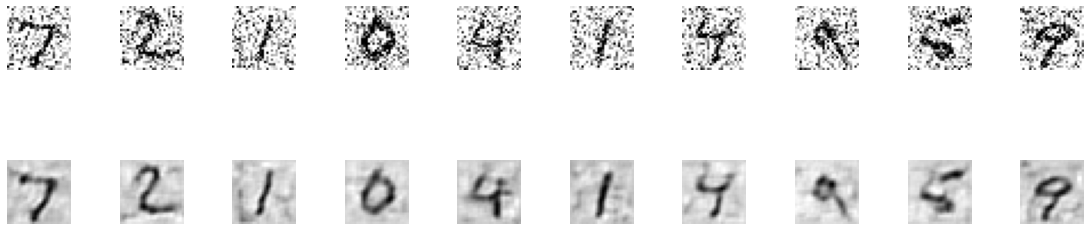

In [185]:
no_noise_img = model.predict(x_test_noisy) # 

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    plt.axis('off')
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()

# **Partie III -- Détection d'anomalies**
L'objectif de cette partie est déceler une anomalie dans les données en utilsant un autoencodeur. 

## 1) Lisez et analysez le fichier csv. Que contient df ?

In [50]:
import pandas as pd
df = pd.read_csv('anomaly.csv')

print(df.head())
print(df.groupby('Quality')['Quality'].count())

       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good
Quality
Bad      407
Good    1054
Name: Quality, dtype: int64


## 2) Nettoyez le fichier anomaly.csv (supprimer 'Date')

In [51]:
df.drop(['Date'],axis=1,inplace=True)

In [52]:
print(df.head())
print(df.groupby('Quality')['Quality'].count())

   Power  Detector Quality
0     96         8    Good
1     96        10    Good
2     91         8    Good
3     97         9    Good
4     91        11    Good
Quality
Bad      407
Good    1054
Name: Quality, dtype: int64


## 3) Préparez le jeu de données en expliquant les différentes lignes de code ci-dessous : 

In [49]:
#COnvert non-numeric to numeric
#df.Quality[df.Quality == 'Good'] = 1
#df.Quality[df.Quality == 'Bad'] = 2

df.replace(to_replace='Good', value= 1, regex=True,inplace=True)
df.replace(to_replace='Bad', value= 2, regex=True,inplace=True)

In [47]:
print(df.head())
print(df.groupby('Quality')['Quality'].count())

   Power  Detector Quality
0     96         8       1
1     96        10       1
2     91         8       1
3     97         9       1
4     91        11       1
Quality
1    1054
2     407
Name: Quality, dtype: int64


In [48]:
# Séparation des données "good" des données "bad"
good_mask = df['Quality'] == 1
bad_mask = df['Quality'] == 2 

df.drop('Quality',axis=1,inplace=True)
df_good = df[good_mask]
df_bad = df[bad_mask]

print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

# Jeu de données
x_good = df_good.values
x_bad = df_bad.values

Good count: 1054
Bad count: 407


## 4) Préparez le jeu de données d'entrainement et de test.

In [53]:
from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

print(f"Good train count: {len(x_good_train)}")
print(f"Good test count: {len(x_good_test)}")

Good train count: 790
Good test count: 264


## 5) Expliquez l'architecture du réseau décrite ci-dessous. Identifiez le type de réseau de neurones.

In [54]:
model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(x_good.shape[1])) 

NameError: ignored

## 6) Configurez l'architecture avant la phase d'entraiement en choisissant :
- la fonction de côut 'mean_squared_error',
- l'optimization : 'adam'
- la métrique de mesure de la performance : 'accuracy'

In [193]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics= ['accuracy'])

## 7) Donnez un aperçu du modèle et analysez le réseau.

In [194]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 dense_17 (Dense)            (None, 3)                 33        
                                                                 
 dense_18 (Dense)            (None, 10)                40        
                                                                 
 dense_19 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________
None


## 8) Entrainez le modèle en utilisant par exemple 100 episodes et un batch_size de XXX. 

In [195]:
model.fit(x_good_train, x_good_train,batch_size=64, epochs=1000)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 6941.3208 - accuracy: 1.0000
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 6191.0469 - accuracy: 1.0000
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 5637.9663 - accuracy: 1.0000
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 5256.8735 - accuracy: 1.0000
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 4987.3345 - accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 4795.5137 - accuracy: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 4656.7729 - accuracy: 1.0000
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 4552.3882 - accuracy: 1.0000
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 4468.0483 - accuracy: 1.0000
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 4391.868

## 9) Evaluez le modèle entrainé. Affichez et interprétez les scores obtenus.

In [196]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))
